# Amr Abdelhamed Abdala G5

##  Gradient decent for optmizing linear regrssion

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score ,mean_absolute_error , mean_squared_error
import seaborn as sns
%matplotlib inline
np.random.seed(611)

In [2]:
x = np.linspace(0,20).reshape((-1,1))
a = -2 
b = 1
y = a*x + b 
x.shape
y.shape

(50, 1)

#### Explore your data


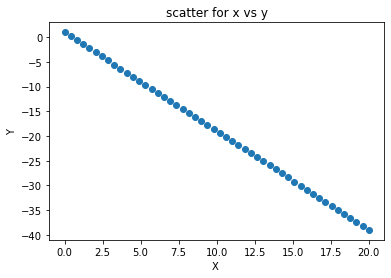

In [3]:
plt.scatter(x,y)
plt.xlabel("X ")
plt.ylabel("Y")
plt.title("scatter for x vs y")
plt.show()

* **Feature vector X shape : (m,n)**
* **Outcomes vector Y shape : (m,1)** 
* **$H(\theta)$ shape : (m,1)** 
* **So the shape of parameter vector $\theta$ : (1,n)** 
* **And shaoe of Gradients of each $\theta$ : (1,n)**

$$\large h(\theta) = \theta_0 X_0 + \theta_1 X_1 + ... +\theta_n X_n $$

we can do same operation with matrix multiplication (dot product)

## $$ h(\theta) = X \theta_.T $$
#### check the shapes $$\large (m,1) : (m,n) (n,1).T $$


## linear Regression Cost Function

$$ J(\theta) = \frac{1}{2m} \left( \sum_{i=1}^m \left( h_\theta\left( x^{(i)} \right) - y^{(i)} \right)^2 \right) $$

---

## Linear Regression Gradient

Correspondingly, the partial derivative of the cost function for regularized linear regression is defined as:

$$
\begin{align}
& \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} & \qquad \text{for } j = 0 \\
& \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} \right)  & \qquad \text{for } j \ge 1
\end{align}
$$

use dot product implementation :

$$ \frac{\partial J(\theta)}{\partial \theta_n}  = \frac{1}{m} ( h_\theta  - Y)  X  $$
#### check the shape $$ (1,n) : ((m,1)-(m,1)).T   (m,n) $$
---

In [106]:
class Model:

    def __init__(self, x, y, epochs,opt,learining_rate=.001,Batchsize= None, monitor=True ,beta1= 0.9,beta2 = 0.99,epsilon=10**-7):
        """class constructor: initialize attributes and fit the model.
        Args:
            x (numpy array of numbers) : Feature matrix.
            y (numpy array of numbers) :  vector of outcome of each feature.
            learining_rate (float , optional = 0.001) :
            stop_at (float , optional = 10**-10) : iterate to reduce the gerdiants to be below stop_at.
            monitor (boolean , optional =True) : True , print the value of (the loss and the gradints) for each iteration. 
                                                 False , will print value of (the loss and the gradints) for last iteration.  

        """
        self.x = np.array(np.append(np.ones((x.shape[0], 1)), x, axis=1) )
        self.y = np.array(y)
        self.learining_rate = learining_rate
        self.theta = self.intilalizeTheta(self.x.shape[1])
        self.historyLoss = pd.DataFrame(columns=["Epoch","Itteration","loss"])
        self.historyGradients = pd.DataFrame(columns=["Epoch","Itteration"]+[f"G{i}" for i in range(self.x.shape[1])])
        self.historyTheta = pd.DataFrame(columns=["Epoch","Itteration"]+[f"Theta{i}" for i in range(self.x.shape[1])])
        self.beta1= beta1
        self.beta2= beta2
        self._mt=np.zeros_like(self.theta)
        self._vt=np.zeros_like(self.theta)
        self._epsilon= epsilon
        if (Batchsize == None) :
            Batchsize = self.x.shape[0]/4
        elif (Batchsize > self.x.shape[0]) and (Batchsize < 1) :
            Batchsize = self.x.shape[0]/4
        self.fit(Batchsize,epochs,eval("self."+opt),learining_rate,monitor)
        
    def intilalizeTheta(self, n):
        """Randomly intilalize Theta.
        Args:
            n (Intger): The lenght of theta vector

        Returns:
             (numpy array): vector with value of Theta
        """
       # return np.random.randint(1,9,size =(1,n))/10
        return np.zeros((1,n))
    def lossmse(self,y_hat,y):
        """calculate error based on the Mean Square Error function.
        Args:
            y (numpy array): the outcomes vector
            y_hat (numpy array): the perdictions vector

        Returns:
            loss (float) 
        """
        m = self.y.shape[0]
        loss = np.sum((1/(2*m)) * (y_hat - y)**2)
        return loss

    def gradientsmse(self,y, y_hat,x):
        """calculate the gradints Mean Square Error function
        Args:
            y (numpy array): the outcomes vector
            y_hat (numpy array): the perdictions vector
            x (numpy array): the featurs vector
            theta (numpy array): the model parameters
        Returns:
            gradients (numpy array): value of gradients for each theta

        """
        m = y.shape[0]
        if m==0: m=1
        gradients = np.dot((y_hat - y).T, x)/m
        return gradients  

    def fit(self,batchsize,epochs,opt,learining_rate,monitor):
        """fit linear regrestion model.

        Args:
            x (numpy array of numbers) : Feature matrix.
            y (numpy array of numbers) :  vector of outcome of each feature.
            monitor (boolean , optional =True) : True , print the value of (the loss and the gradints) for each iteration. 
                                                 False , will print value of (the loss and the gradints) for last iteration.
        """
        epoch_num = 1
        m = self.x.shape[0]
        lossconter, thetaconter =  0 ,0

        while epoch_num <= epochs:
            iteration =0
            for batch_start in range(0,m-1,batchsize):
                iteration += 1
                batch_end = batch_start + batchsize
                if batch_end > m-1 : batch_end = m-1
                y_hat = np.dot(self.x[batch_start:batch_end,:], self.theta.T)
                gradients = opt(self.x[batch_start:batch_end,:],self.y[batch_start:batch_end,:],y_hat)
                
                loss = np.round(self.lossmse( self.y[batch_start:batch_end,:],
                                             y_hat), 10)
                self.toHistory(epoch_num,iteration, loss, gradients)
                if (monitor):self.monitor(epoch_num,iteration,loss)     
            epoch_num +=1
            
        self.monitor(epoch_num-1,iteration,loss)

    def GD(self,x,y,y_hat):
        gradients = self.gradientsmse(y,y_hat,x)
        self.theta = self.theta - (gradients *self.learining_rate )
        return gradients 
    
    def MomentumGD(self,x,y,y_hat):
        gradients = self.gradientsmse(y,y_hat,x)
        self._mt = self.beta1*self._mt + (gradients *self.learining_rate )
        self.theta = self.theta -self._mt
        return gradients 
    
    def NAG(self,x,y,y_hat):
        thetatemp= self.theta - self.beta1 * self._mt
        gtemp = self.gradientsmse(y,np.dot(x,thetatemp.T),x)
        self.theta = thetatemp - (gtemp *self.learining_rate )
        gradients = self.gradientsmse(y,y_hat,x)
        self._mt = self.beta1*self._mt + (gradients *self.learining_rate )
        return gradients 
    
    def Adagrad(self,x,y,y_hat):
        gradients = self.gradientsmse(y,y_hat,x)
        self._vt = self._vt + gradients**2
        self.theta = self.theta - (self.learining_rate/np.sqrt(self._vt+self._epsilon) )*gradients
        
        return gradients 
    
    def RMSprop(self,x,y,y_hat):
        gradients = self.gradientsmse(y,y_hat,x)
        self._vt = self.beta1*self._vt + ((1-self.beta1)*(gradients**2))
        self.theta = self.theta - ((self.learining_rate/(np.sqrt(self._vt)+self._epsilon))*gradients)
        return gradients 
    
    def Adam(self,x,y,y_hat,t=0):
        gradients = self.gradientsmse(y,y_hat,x)
        self._mt = self.beta1*self._mt + ((1-self.beta1)*gradients)
        self._vt = self.beta2*self._vt + ((1-self.beta2)*(gradients**2))
        t= self.historyLoss.shape[0]+1
        m_hat = self._mt/(1-self.beta1**t)
        v_hat = self._vt/(1-self.beta2**t)
        self.theta = self.theta - ((self.learining_rate/(np.sqrt(v_hat)+self._epsilon) )*m_hat)
        return gradients 
    
    def NAdam(self,x,y,y_hat):
        gradients = self.gradientsmse(y,y_hat,x)
        self._mt = self.beta1*self._mt + ((1-self.beta1)*gradients)
        self._vt = self.beta2*self._vt + ((1-self.beta2)*(gradients**2))
        t = self.historyLoss.shape[0]+1
        m_hat = self._mt/(1-self.beta1**t)
        v_hat = self._vt/(1-self.beta2**t)
        D = (self.beta1*m_hat)+ (((1-self.beta1)*gradients)/(1-self.beta1**t))
        self.theta = self.theta - ((self.learining_rate/(np.sqrt(v_hat)+self._epsilon))*D)
        return gradients 
    
    def pridict(self, x):
        """make perdiction corresponding to provided values.
        Args:
            xp (numpy array of numbers) : Feature matrix to perdict values 

        Returns:
            prdictions: denormlized perdictions corresponding to xp values
        """
        x = np.array(np.append(np.ones((x.shape[0], 1)), x, axis=1) )
        prdictions = np.dot(x, self.theta.T)
        return prdictions
    
    def monitor(self, epoch_num,iteration, loss):
        """print the values of Loss ,Gradients and Theta for each ittration.
        Args:
            idx (int) : number of itteration
            loss (int) : error 
            gradients (numpy array): value of gradients for each theta
            theta (numpy array): the model parameters
        """
        print(f"epoch: {epoch_num} | Iteration : {iteration} | Loss = {loss} ")

    def toHistory(self, epoch_num,iteration, loss, grad ):
        """cache the values of Loss ,Gradients and Theta for each ittration.
        Args:
            i (int): number of itteration
            loss (numpy.float) : error 
            gradients (numpy array): value of gradients for each theta
            theta (numpy array): the model parameters
        """
        self.historyLoss = self.historyLoss.append(
            pd.Series([epoch_num,iteration,loss], index=self.historyLoss.columns).T, ignore_index=True)
        self.historyGradients = self.historyGradients.append(
                                pd.Series([epoch_num,iteration]+grad.tolist()[0], index=self.historyGradients.columns),
                                                             ignore_index=True)
        self.historyTheta = self.historyTheta.append(
                                pd.Series([epoch_num,iteration]+ self.theta.tolist()[0], index=self.historyTheta.columns),
                                                     ignore_index=True)
    def evalute(self):
        """evalute the model to corresponding data.
        Args:
            xe (numpy array) :Feature matrix to perdict values  
            ye (numpy array) : outcomes (True value ) 
        """
        yhat = self.pridict(self.x[:,1:])
        evalution = {"r2": r2_score(self.y, yhat),
                     "Mean Absolute Error":  mean_absolute_error(self.y, yhat),
                     "Mean Squared Error":  mean_squared_error(self.y, yhat)}
        return evalution


In [49]:
def plotmodel(model,x,y):
    loss= model.historyLoss.groupby(by= "Epoch").mean().drop("Itteration",axis=1)
    theta = model.historyTheta.groupby(by= "Epoch").mean().drop("Itteration",axis=1)

    plt.subplots(nrows=1, ncols=2,figsize = (15,5))
    plt.subplot(1, 2, 1)

    plt.plot(x,model.pridict(x), c="red")
    plt.scatter(x,y, c="blue")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("fitted line")

    plt.subplot(1, 2, 2)
    plt.plot(loss["loss"], c="red")
    plt.xlabel("Itterations")
    plt.ylabel("Loss")
    plt.title("loss For each itteration")
    plt.show()
    #-----------------------
    plt.figure()
    n = model.theta.shape[1]
    plt.subplots(nrows=2, ncols=n,figsize = (15,10))
    for i in range(0,n):

        plt.subplot(2,n,i+1)
        plt.plot(theta[f"Theta{i}"],c="red" )
        plt.xlabel("Itterations")
        plt.ylabel(f"Theta{i}")
        plt.title(f"Theta{i} For each itteration")


        plt.subplot(2,n,i+n+1)
        plt.plot(theta[f"Theta{i}"],loss["loss"])
        plt.xlabel(f"Theta{i}")
        plt.ylabel("Loss")
        plt.title(f"Theta{i} to loss for each itteration")
    plt.show()
    #-----------------------
    plt.figure(figsize = (15,5))
    plt.scatter(x, y, c="blue")
    xp = np.array(np.append(np.ones((x.shape[0], 1)), x, axis=1) )
    for i,thet in enumerate(theta.iloc[:,:].values):
        prdictions = np.dot(xp, thet.reshape(-1,n).T)
        plt.plot(x,prdictions , c="red")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("all lines")
    plt.show()

### Batch GD

epoch: 2000 | Iteration : 1 | Loss = 0.000126407 
{'r2': 0.9999981461437737, 'Mean Absolute Error': 0.013413686813361785, 'Mean Squared Error': 0.000257269843652927}


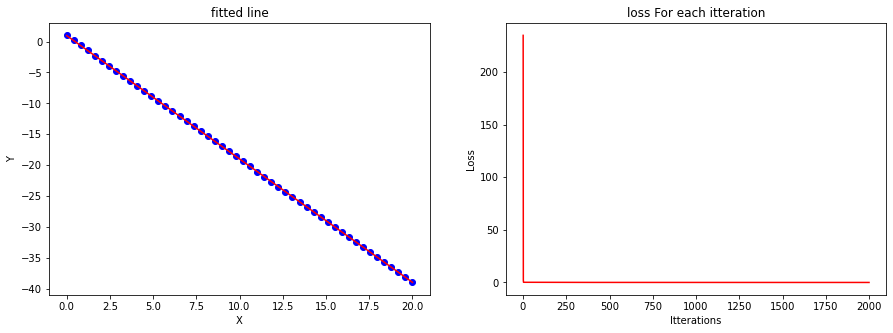

<Figure size 432x288 with 0 Axes>

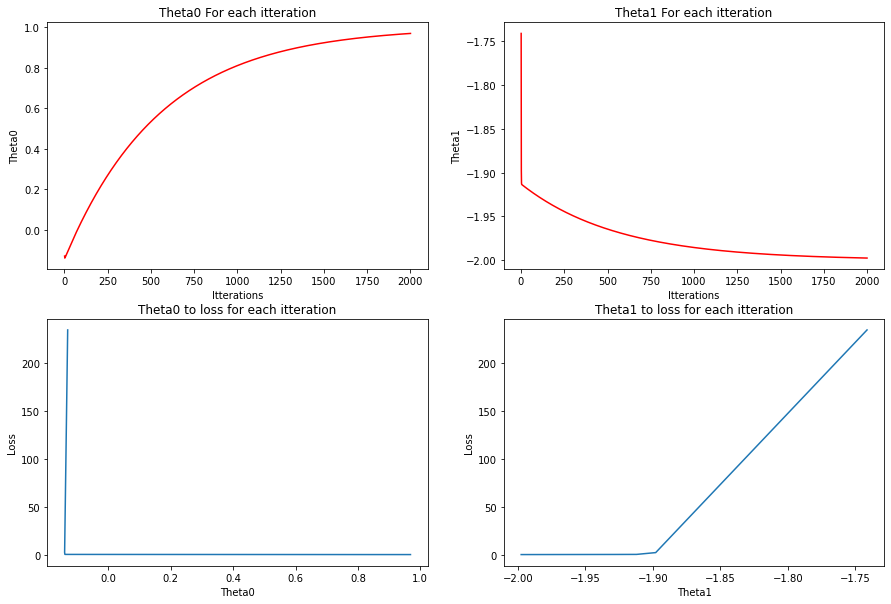

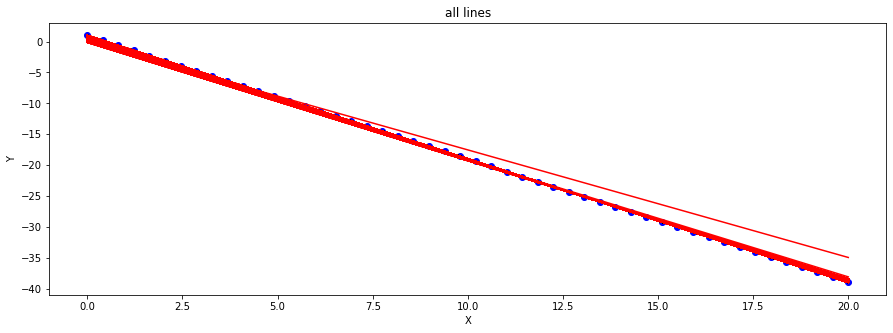

In [30]:
M = Model(x,y,epochs = 2000,opt="GD",Batchsize=x.shape[0], learining_rate=.007, monitor=False)
print(M.evalute())
plotmodel(M,x,y)

### MIni-Batch GD

epoch: 1500 | Iteration : 2 | Loss = 0.0001862099 
{'r2': 0.9999779575026196, 'Mean Absolute Error': 0.04541801834348602, 'Mean Squared Error': 0.0030589588201312408}


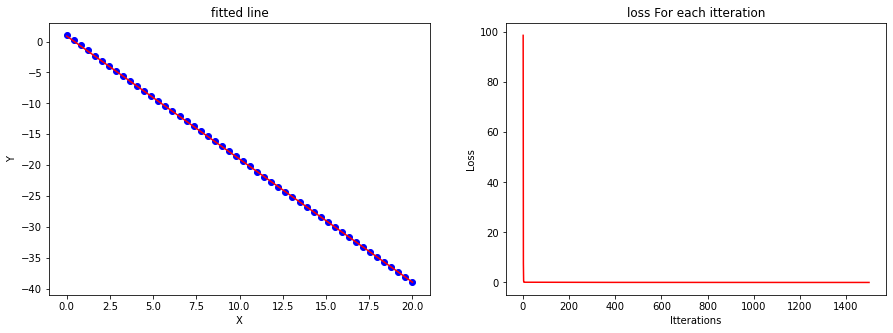

<Figure size 432x288 with 0 Axes>

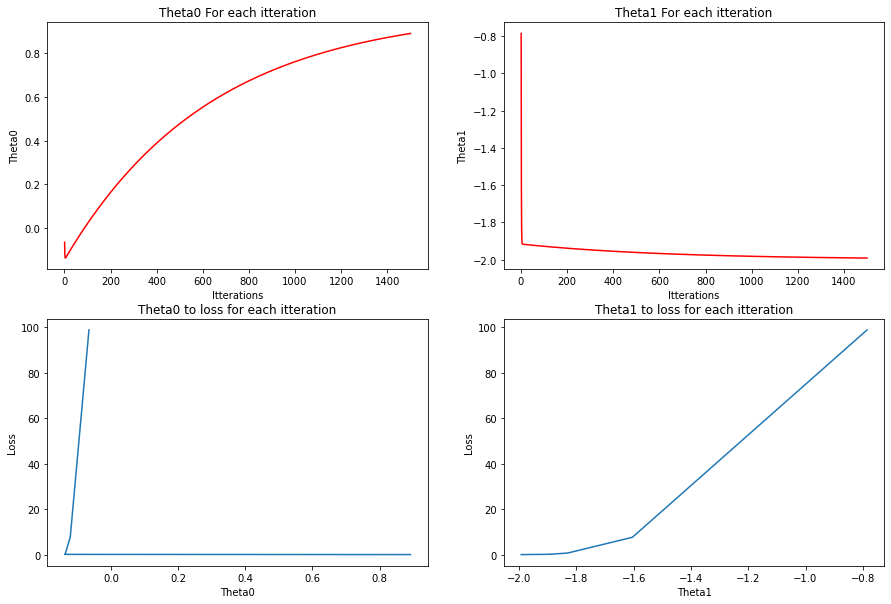

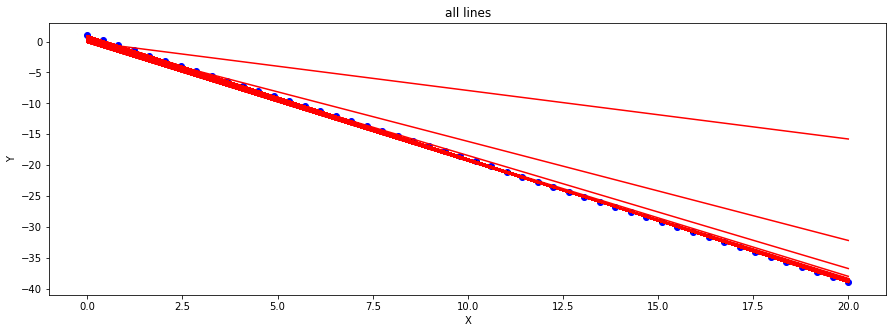

In [31]:
M = Model(x,y,epochs = 1500,opt="GD",Batchsize=25, learining_rate=.003, monitor=False)
print(M.evalute())
plotmodel(M,x,y)

### SGD

epoch: 50 | Iteration : 49 | Loss = 4.721e-07 
{'r2': 0.9996896231753072, 'Mean Absolute Error': 0.1774031380414071, 'Mean Squared Error': 0.0430727022022658}


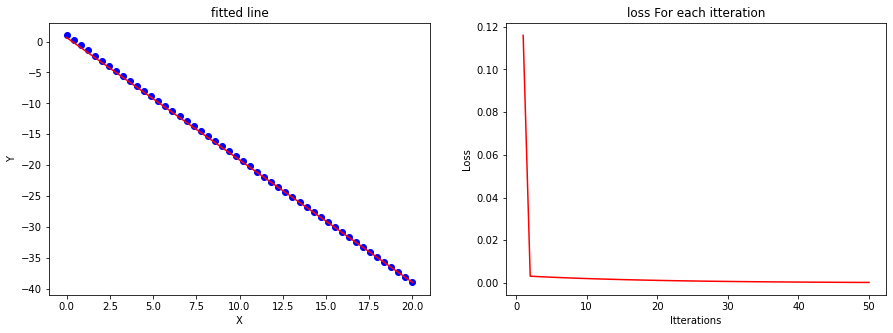

<Figure size 432x288 with 0 Axes>

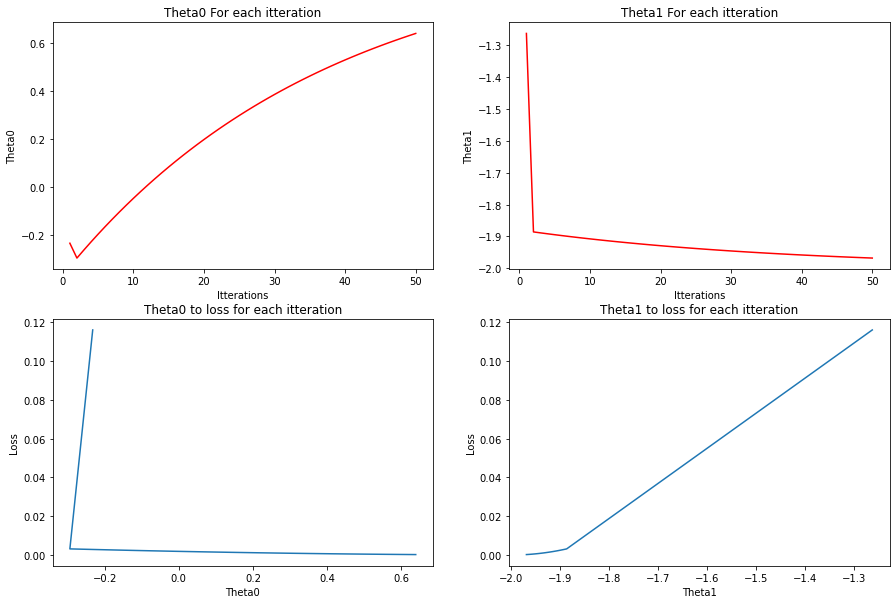

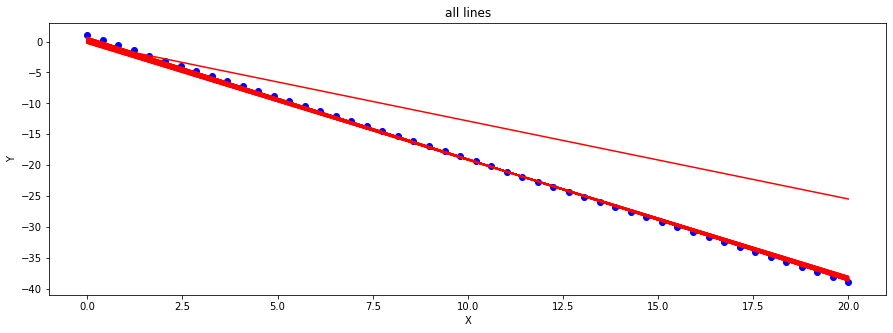

In [32]:
M = Model(x,y,epochs = 50,opt="GD",Batchsize=1, learining_rate=.003, monitor=False)
print(M.evalute())
plotmodel(M,x,y)

### Momentum GD

epoch: 20 | Iteration : 49 | Loss = 1.6207e-06 
{'r2': 0.9999926743191877, 'Mean Absolute Error': 0.026041024435770898, 'Mean Squared Error': 0.001016625092325242}


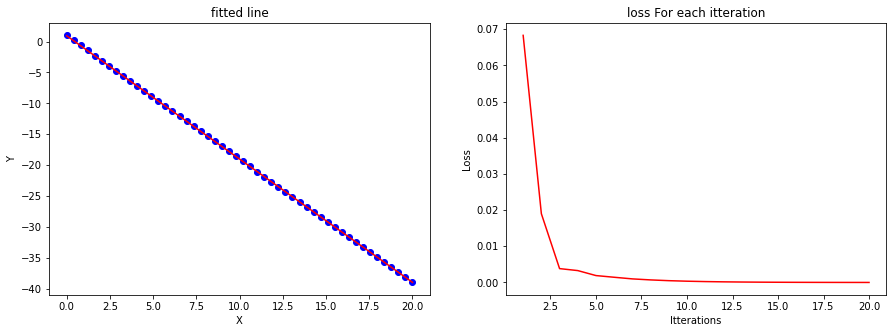

<Figure size 432x288 with 0 Axes>

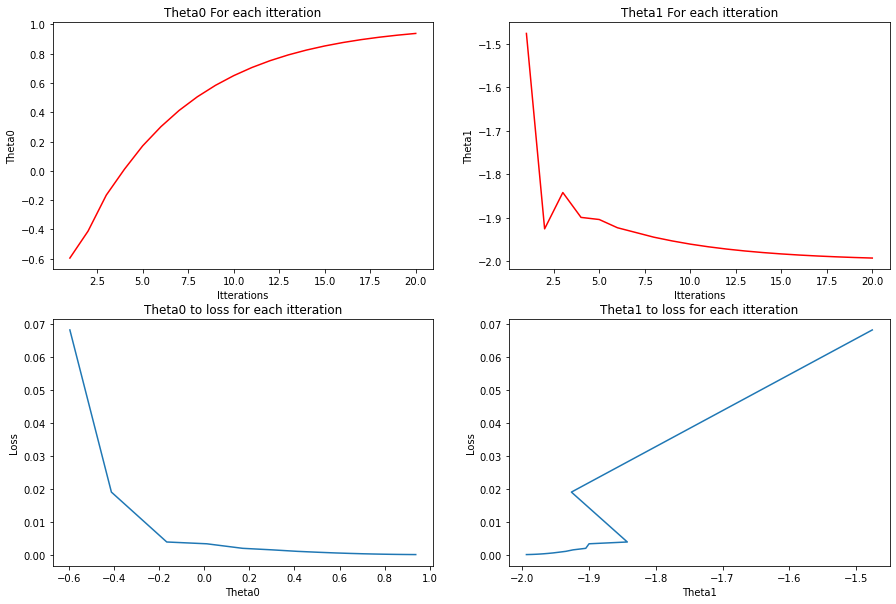

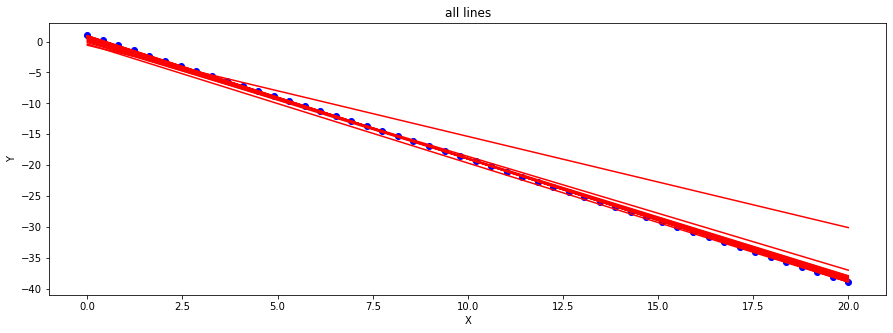

In [42]:
M = Model(x,y,epochs = 20,opt="MomentumGD",Batchsize=1, learining_rate=.003, monitor=False,beta1=0.9)
print(M.evalute())
plotmodel(M,x,y)

### NGD

epoch: 15 | Iteration : 49 | Loss = 1.017e-07 
{'r2': 0.9999764511411535, 'Mean Absolute Error': 0.04846643195182985, 'Mean Squared Error': 0.003268004901143928}


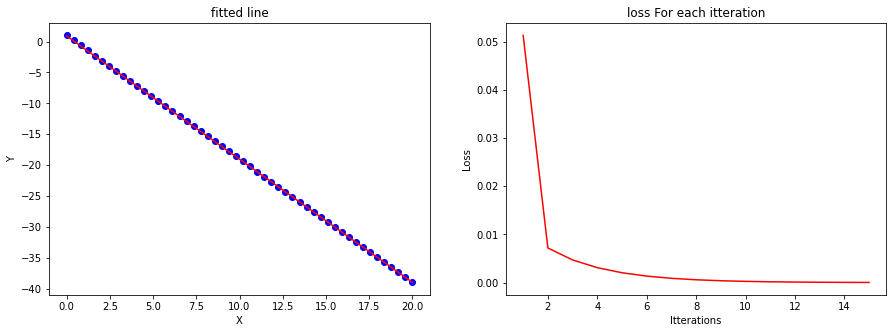

<Figure size 432x288 with 0 Axes>

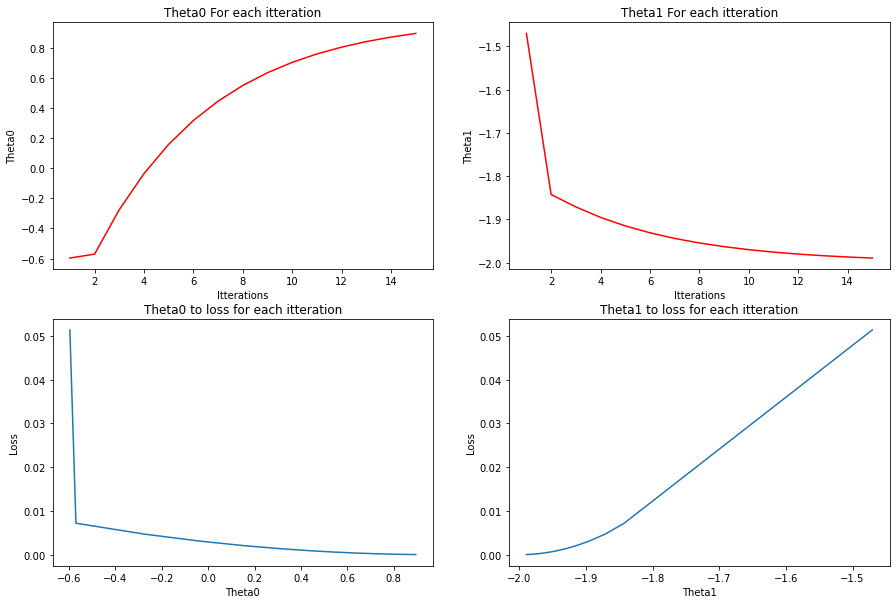

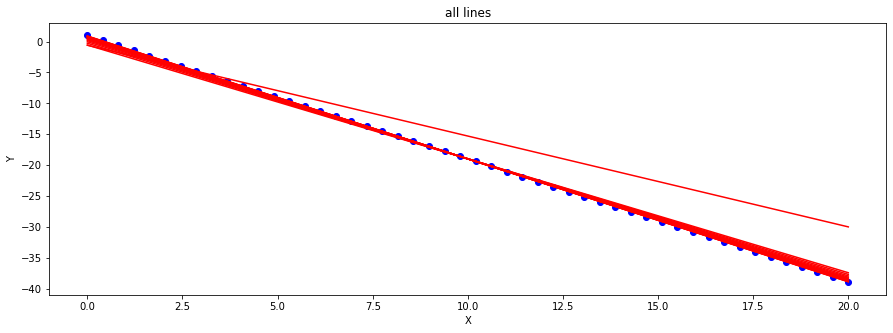

In [43]:
M = Model(x,y,epochs = 15,opt="NAG",Batchsize=1, learining_rate=.003, monitor=False,beta1=0.9)
print(M.evalute())
plotmodel(M,x,y)

### Adagrad

epoch: 1000 | Iteration : 1 | Loss = 1.60306e-05 
{'r2': 0.9999997659691117, 'Mean Absolute Error': 0.004788677624340079, 'Mean Squared Error': 3.247775593813275e-05}


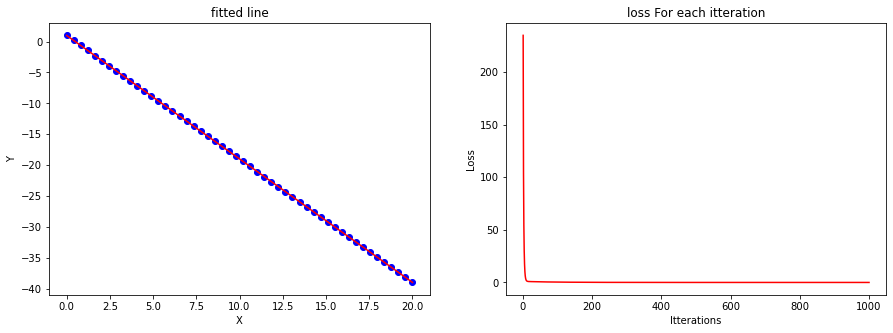

<Figure size 432x288 with 0 Axes>

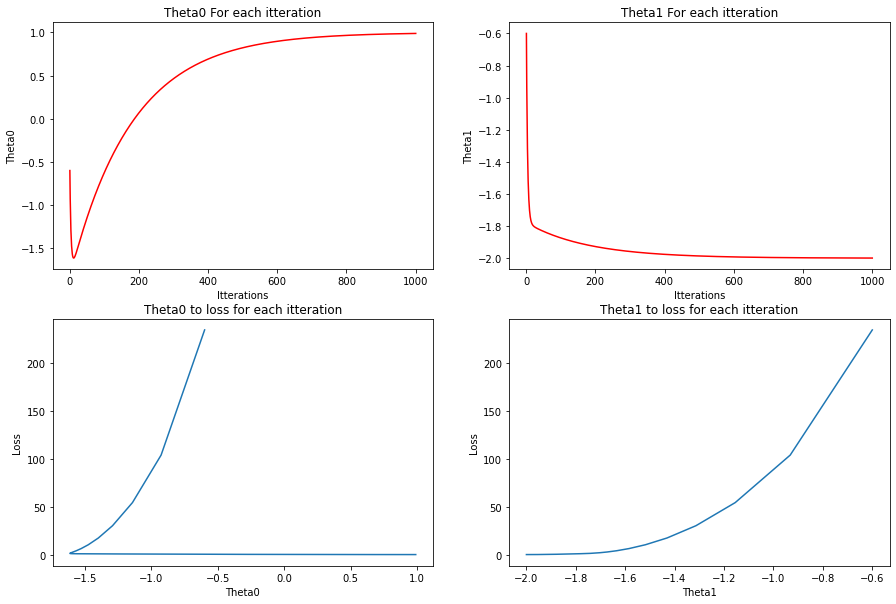

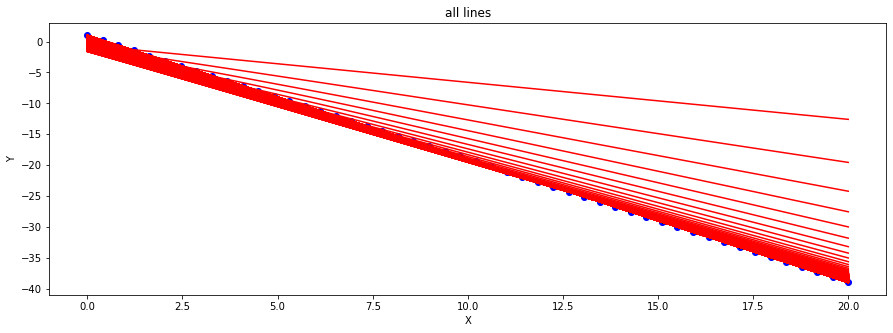

In [58]:
M = Model(x,y,epochs = 1000,opt="Adagrad",Batchsize=x.shape[0], learining_rate=.6, monitor=False,epsilon=10**-7)
print(M.evalute())
plotmodel(M,x,y)

### RMSProp

epoch: 50 | Iteration : 10 | Loss = 3.595e-07 
{'r2': 0.999998590246342, 'Mean Absolute Error': 0.012957383995966609, 'Mean Squared Error': 0.00019563928315048537}


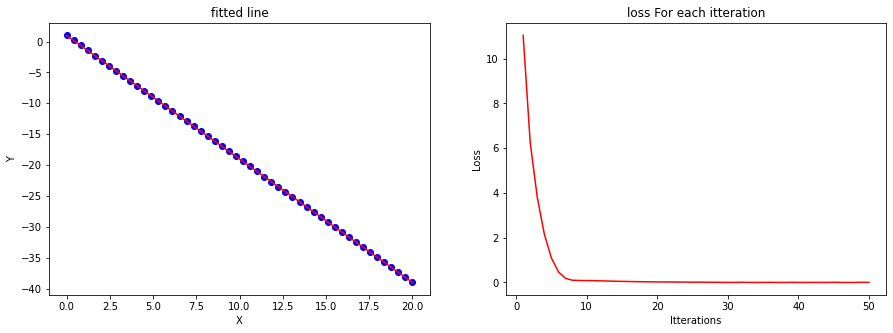

<Figure size 432x288 with 0 Axes>

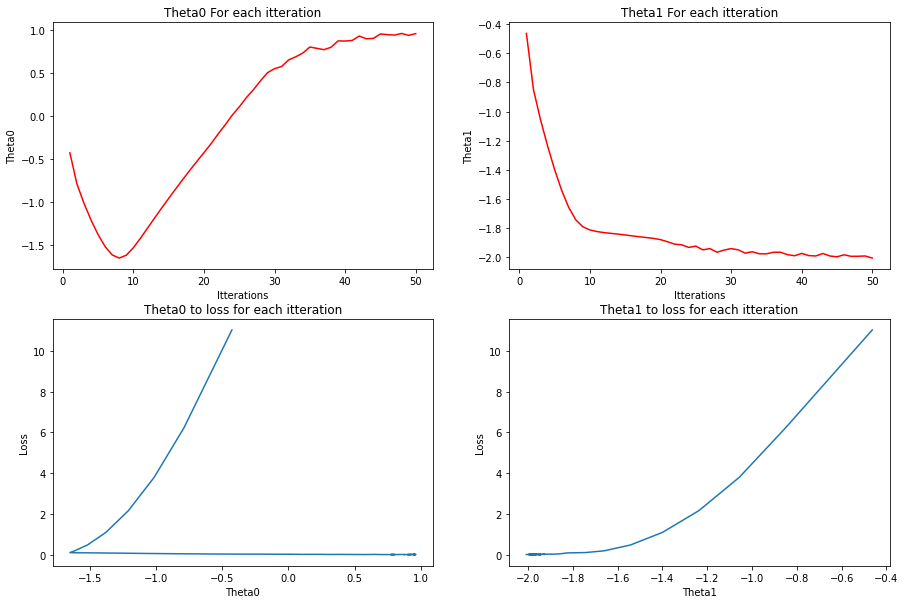

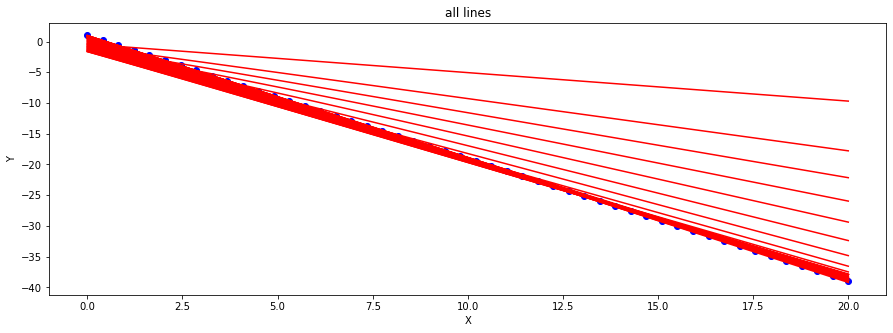

In [107]:
M = Model(x,y,epochs = 50,opt="RMSprop",Batchsize=5, learining_rate=.03, monitor=False,beta1=0.9,epsilon=10**-7)
print(M.evalute())
plotmodel(M,x,y)

### Adam

epoch: 15 | Iteration : 49 | Loss = 6.2767e-06 
{'r2': 0.9999988234483274, 'Mean Absolute Error': 0.01200113564271353, 'Mean Squared Error': 0.00016327655864861978}


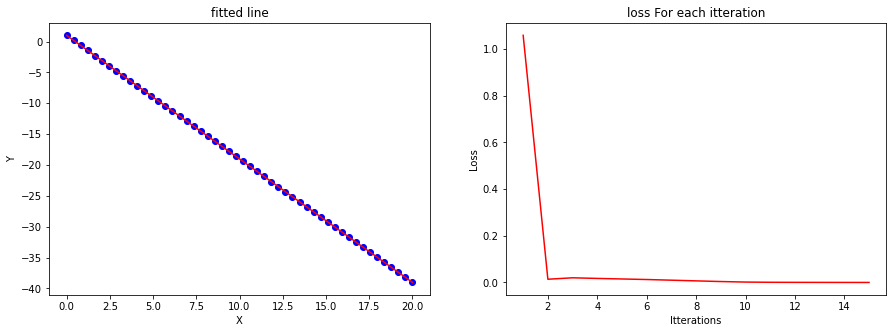

<Figure size 432x288 with 0 Axes>

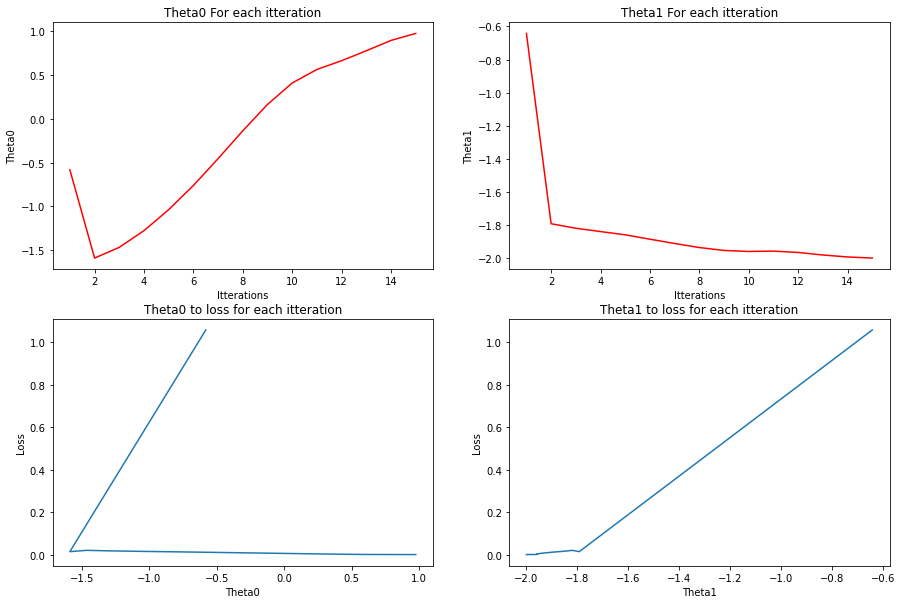

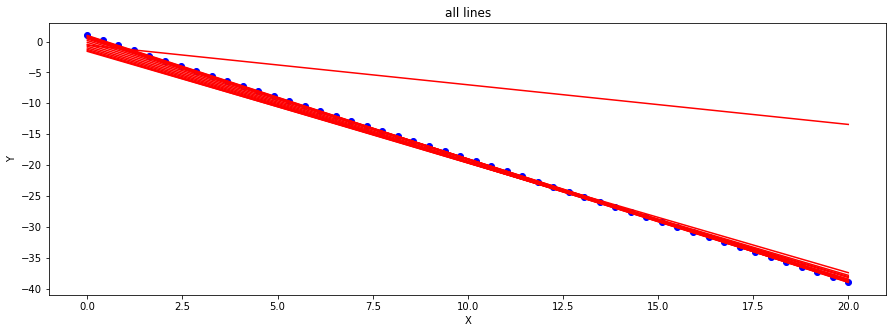

In [123]:
M = Model(x,y,epochs = 15,opt="Adam",Batchsize=1, learining_rate=.03,
          monitor=False,beta1=0.92,beta2=0.99,epsilon=10**-8)
print(M.evalute())
plotmodel(M,x,y)

### NAdam

epoch: 15 | Iteration : 49 | Loss = 0.0 
{'r2': 0.999996917480937, 'Mean Absolute Error': 0.017821555026156496, 'Mean Squared Error': 0.0004277781556831791}


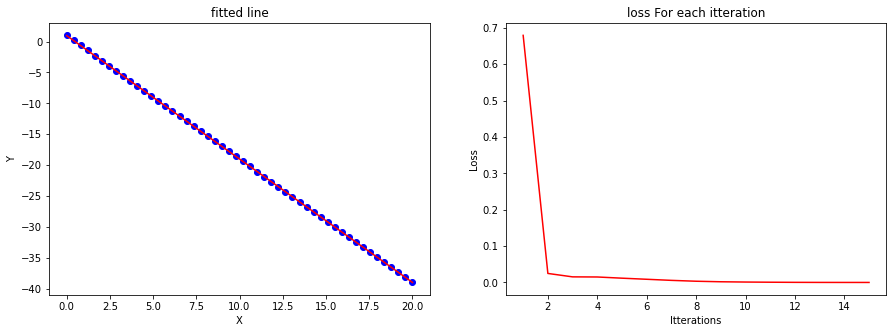

<Figure size 432x288 with 0 Axes>

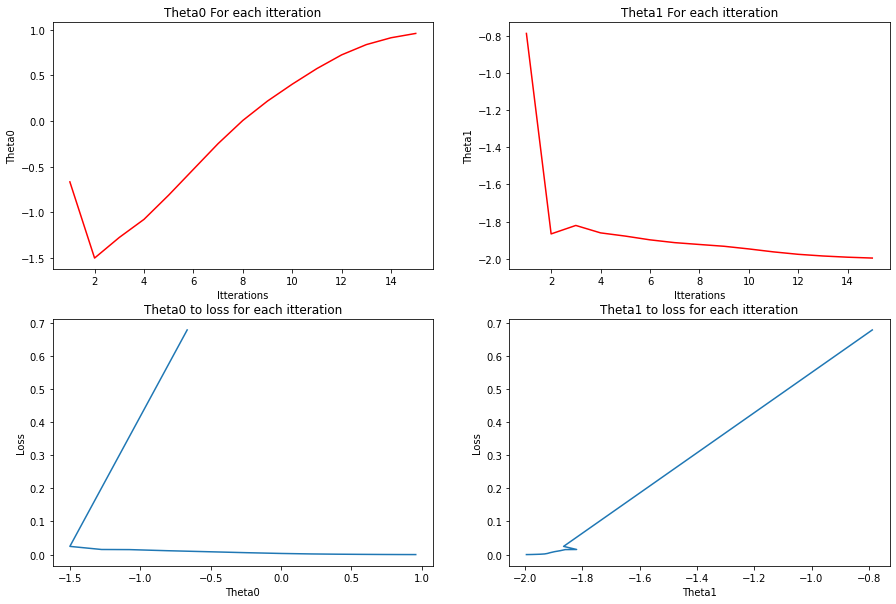

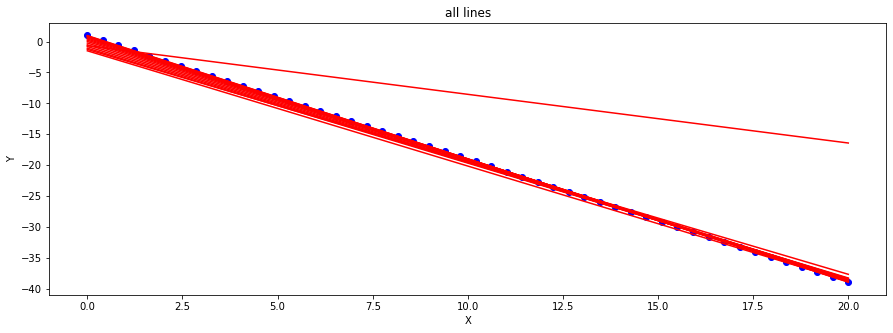

In [121]:
M = Model(x,y,epochs = 15,opt="NAdam",Batchsize=1, learining_rate=.03,
          monitor=False,beta1=0.9,beta2=0.99,epsilon=10**-8)
print(M.evalute())
plotmodel(M,x,y)